# *Imports*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import random

# the functions that are named ending with _c are copyes 
# of the original functions, are only used to be check for clarity
from functions import *

random.seed(26)
np.random.seed(26)

---------------

# **Part 1 of the homework**

## Maximum Likelihood Estimation (MLE)
Given:
$$
    X = [x^1 x^2 \dots x^N] \in \mathbb{R}^{d \times N}
$$

$$
    Y = [y^1 y^2 \dots y^N] \in \mathbb{R}^N
$$

are generated by considering $N$ independent identically distributed (i.i.d.) samples $x^i \sim p(x)$, where $p(x)$ is the unknown distribution of the inputs, and considering $y^i = f(x^i)$ for any $i = 1, \dots, N$.  
$p_\theta(y|x)$ is the **likelihood** or **posterior distribution** of $y$ given $x$.

We want to find parameters $\theta \in \mathbb{R}^s$ such that the probability of observing $Y = [y^1 y^2 \dots y^N]$ given $X = [x^1 x^2 \dots x^N]$ is as high as possible.
$$
    \theta_{MLE} = \arg\max_{\theta \in \mathbb{R}^s} p_\theta(Y|X)
$$

Since the logarithm function is monotonic, applying it to the loss function of the previous optimization problem does not alterate its solution.  
Moreover, since for any function $f(x)$, $\arg\max_x f(x) = \arg\min_x -f(x)$, and $y^1, y^2, \dots, y^N$ are independent under $p(y |x)$, then:

$$
    \theta_{MLE} = \arg\max_{\theta \in \mathbb{R}^s} \prod_{i=1}^N p_\theta(y^i|x^i) = \arg\min_{\theta \in \mathbb{R}^s} -\log \prod_{i=1}^N p_\theta(y^i|x^i) =
$$
$$
 \arg\min_{\theta \in \mathbb{R}^s} \sum_{i=1}^N -\log p_\theta(y^i|x^i)
$$

We will consider :

$$
    p_\theta(y|x) = \mathcal{N}(f_\theta(x), \sigma^2 I)= \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{(y - f_\theta(x))^2}{2\sigma^2}}
$$

where $\mathcal{N}(f_\theta(x), \sigma^2 I)$ is a Gaussian distribution with mean $f_\theta(x)$ and variance $\sigma^2 I$.


------

### Necessary function fro MLE

1. `loss_MLE`: represents the loss function of MLE with Gaussian assumption defined as:
$$ \frac{1}{2}\| \Phi(X) \theta - Y \|_2^2 $$

In [2]:
def loss_MLE_c(theta,params_f): 
    X, Y = params_f
    Phi_X = polynomial_features(X, len(theta)).T 
    
    return (np.linalg.norm(Phi_X @ theta - Y,2)**2)/2



2. `grad_loss_MLE`: represents the gradient of the loss function of MLE with Gaussian assumption defined as:
$$ \Phi(X)^T (\Phi(X)\theta - Y) $$


In [3]:
def grad_loss_MLE_c(theta,params_f): 
    X, Y = params_f
    Phi_X = polynomial_features(X, len(theta)).T
    return Phi_X.T @ (Phi_X @ theta - Y)

3. `MLE`: represents the Normal Equation for the MLE with Gaussian assumption defined as:
$$ (\Phi(X)^T \Phi(X))^{-1} \Phi(X)^T Y $$

In [4]:
def MLE_c(D,degree_poly):
    X,Y = D
    K = degree_poly
    Phi_X = polynomial_features(X, K)
    A = Phi_X @ Phi_X.T
    b = Phi_X @ Y
    return cholesky(A,b)

Let $f_\theta(x)$ be a polynomial regression model. 

* Let the `poly_regression_small.csv` from Virtuale be the `training set` and let the 20% of the data in the `poly_regression_large.csv` dataset be the `test set`.
* For a given value of $K$, and given the three Python functions computing $\theta_{MLE}, I create and compare the performance of the three regression models.

  $$
  Err (MSE) = \frac{1}{N_{test}} \sum_{i=1}^{N_{test}} (f_\theta(x^i) - y^i)^2,
  $$

* Plot, for different values of $K$, the training datapoints and the test datapoints with different colors and visualize (as a continuous line) the three learned regression model $f_\theta(x)$.
* Plot and compute the training and test error for increasing values of $K$.

In [5]:
ds = pd.read_csv("poly_regression_large.csv")
# Convert data into a matrix
data = np.array(ds)

# Extract the test part
X = data[:, 1]
Y = data[:, 2]
_, (X_test, Y_test) = split_data(X, Y, per_train=0.8)

train_csv = pd.read_csv("poly_regression_small.csv")
train = np.array(train_csv)
X_train, Y_train = train[:, 1], train[:, 2]
print(f"Shape of the test data: {X_test.shape}")
print(f"Shape of the training data: {X_train.shape}")

# Setting necessary\usefull general parameters
titles_MLE = ["$\\theta_{MLE}$ using GD", "$\\theta_{MLE}$ using SGD", "$\\theta_{MLE}$ using Normal Equation"]
titles_MAP = ["$\\theta_{MAP}$ using GD", "$\\theta_{MAP}$ using SGD", "$\\theta_{MAP}$ using Normal Equation"]
train_data = (X_train, Y_train)
kk = list(range(2,12)) # polynomial degrees

# data needed for SGD
epoch_or_iter = 2000 # also used for GD
batch_size = 5
alpha = 0.01

Train test split = 800, 200
Shape of the test data: (200,)
Shape of the training data: (50,)


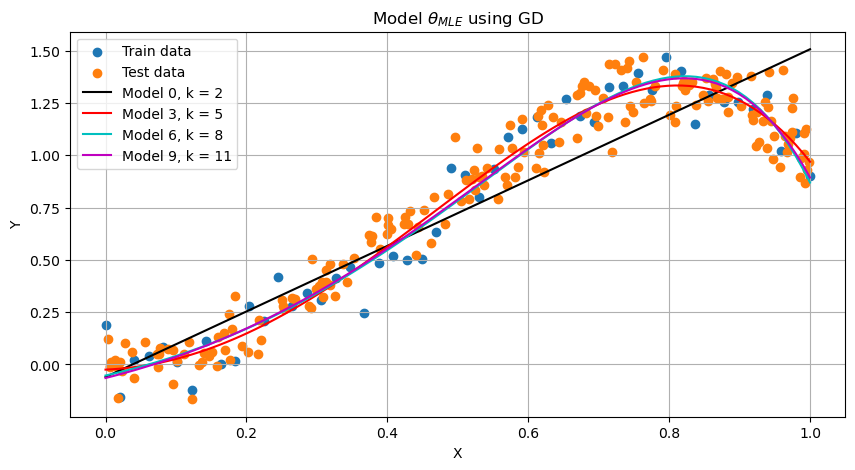

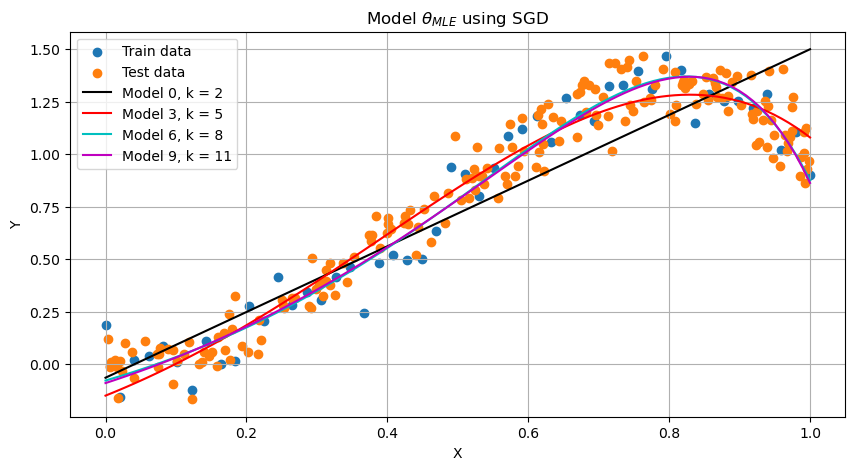

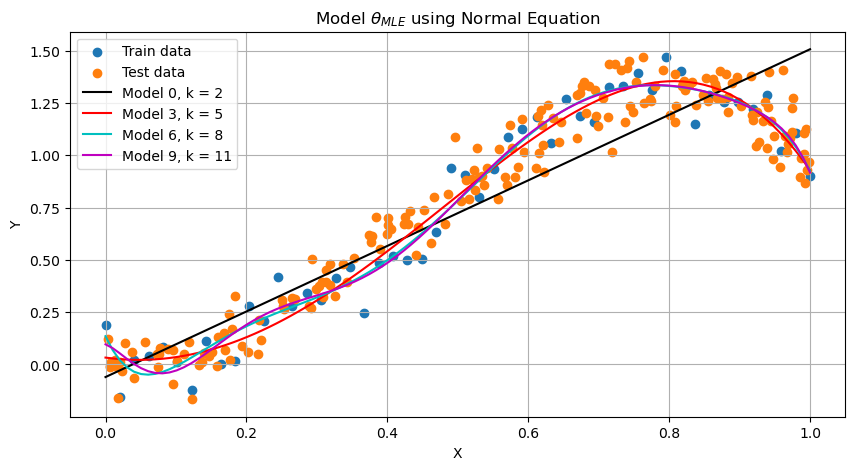

In [6]:
#-------------------------------------------------------------------------------------------------
# MLE GD
#-------------------------------------------------------------------------------------------------
thetas_history_GD_MLE, converging_kk_history_GD_MLE = compute_weights(
    'GD', 'MLE', kk, train_data, loss=loss_MLE
    , grad_loss=grad_loss_MLE, kmax=epoch_or_iter)
# plot
plot_poly_regression(
    X_train, Y_train, X_test, Y_test, thetas_history_GD_MLE, 
    title=titles_MLE[0])
#-------------------------------------------------------------------------------------------------
# MLE SGD
#-------------------------------------------------------------------------------------------------
thetas_history_SGD_MLE, converging_kk_history_SGD_MLE = compute_weights(
     'SGD', 'MLE', kk ,train_data,loss=loss_MLE, 
     grad_loss=grad_loss_MLE,batch_size = batch_size, 
     n_epochs=epoch_or_iter, alpha = alpha)
# plot
plot_poly_regression(
    X_train, Y_train, X_test, Y_test, thetas_history_SGD_MLE,
    title=titles_MLE[1])
#-------------------------------------------------------------------------------------------------
# MLE Normal
#-------------------------------------------------------------------------------------------------
thetas_history_norm_MLE, converging_kk_history = compute_weights(
    'Normal', 'MLE', kk ,train_data)
# plot
plot_poly_regression(
    X_train, Y_train, X_test, Y_test, thetas_history_norm_MLE
    ,title=titles_MLE[2])

From the graphs we can see how the models with $\theta_{MLE}$ using $GD$ and $SGD$ tend not to overfit, even for very high $K$ parameters.  
All three variants of the models of $\theta_{MLE}$, $for K = 2$, present an almost identical approsiamtion. The former situation, which is called **underfitting**, describe a model too rigid, with the implication that it can potentially be unable to capture the complexity of the data.   
For $MLE$ normal equation we can see how for $k > 5$ it tends to **overfit** by adapting too well to the training data, ending up *learning the noise*.

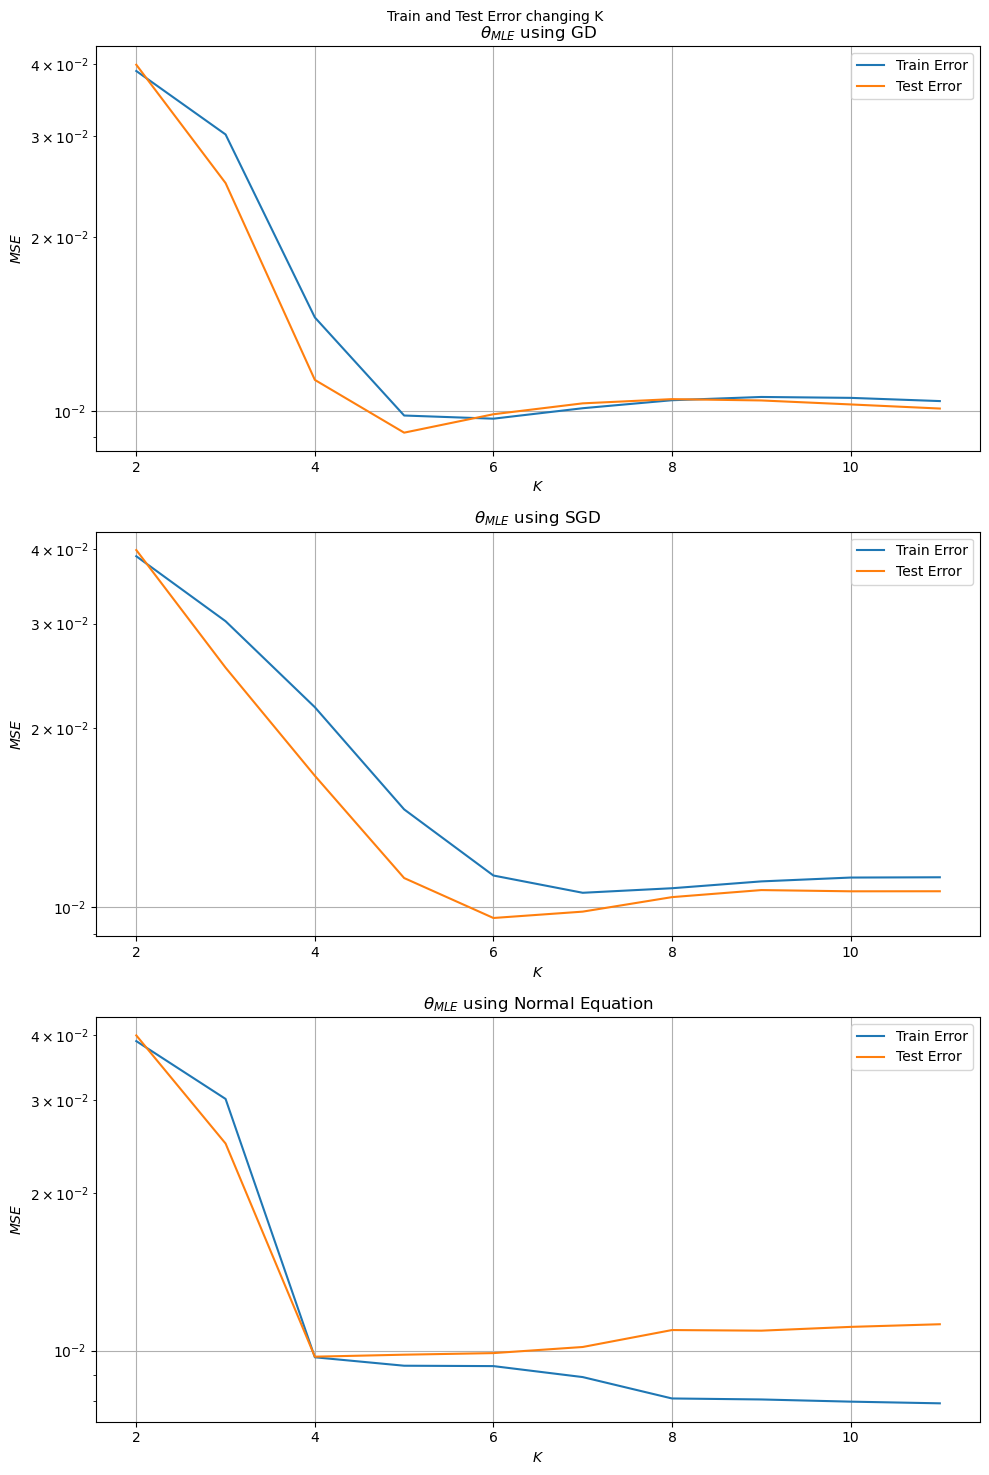

In [7]:
#plot the train and test error respect to k
theta_histories = [thetas_history_GD_MLE, thetas_history_SGD_MLE, thetas_history_norm_MLE]
plot_train_test_error_respect_to_k(X_train, Y_train, X_test, Y_test, theta_histories, titles=titles_MLE)

This plots holds what was said before.

-----------

## Maximum A Posteriori (MAP)
In this case we want to solve the optimization problem:
$$
    \theta_{MAP} = \arg\max_{\theta \in \mathbb{R}^s} p(\theta|X,Y).
$$

$p(\theta|X,Y)$ is called **posterior distribution**.
Since in general the generation of $X$ given $Y$ is not Gaussian, we can express the posterior distribution $p(\theta|X,Y)$ in terms of the likelihood $p(Y|X, \theta)$ (which we know to be Gaussian) and the prior $p(\theta)$, as a consequence of Bayes Theorem.  
Indeed, it holds:

$$
    p(\theta| X,Y) = \frac{p(Y|X, \theta) p(\theta)}{p(Y|X)}
$$
from which we obtain:
$$
    \theta_{MAP} = \arg\max_{\theta \in \mathbb{R}^s} \frac{p(Y|X,\theta) p(\theta)}{p(Y|X)} = \arg\min_{\theta \in \mathbb{R}^s} - \log p(Y|X,\theta) - \log p(\theta)
$$
where the term $p(Y|X)$ has been removed since it is constant as a function of $\theta$.

---------------

### Necessary function fro MLE

1. `loss_MAP`: represents the loss function of MAP with Gaussian assumption defined as:
$$ \frac{1}{2}\| \Phi(X) \theta - Y \|_2^2 + \frac{1}{2}\lambda \| \theta \|_2^2$$

In [8]:
def loss_MAP_c(theta,params_f):
    X, Y, lam = params_f
    Phi_X = polynomial_features(X, len(theta)).T
    return (np.linalg.norm(Phi_X @ theta - Y,2)**2 + lam * np.linalg.norm(theta, 2) ** 2)/2 

2. `grad_loss_MAP`: represents the gradient of the loss function of MAP with Gaussian assumption defined as:
$$ \Phi(X)^T (\Phi(X)\theta - Y) + \lambda \theta $$

In [9]:
def grad_loss_MAP_c(theta,params_f): 
    X, Y, lam = params_f
    Phi_X = polynomial_features(X, len(theta)).T
    return Phi_X.T @ (Phi_X @ theta - Y) + lam * theta

3. `MAP`: represents the Normal Equation for the MAP with Gaussian assumption defined as:
$$ (\Phi(X)^T \Phi(X) + \lambda I)^{-1} \Phi(X)^T Y $$

In [10]:
def MAP_c(D, degree_poly, l):
    X,Y = D
    K = degree_poly
    Phi_X = polynomial_features(X, K)
    A = Phi_X @ Phi_X.T + l*np.identity(K)
    b = Phi_X @ Y
    return cholesky(A,b)

* Repeating the same experiments by considering the MAP formulation with Gaussian assumption on the prior term $p(\theta)$. 
* Test different values of $\lambda > 0$ in the experiments.

In [11]:
# General parameters
kk = 8 # polynomial degree

# data needed for SGD
epoch_or_iter = 2000 # also used for GD
batch_size = 5
alpha = 0.1

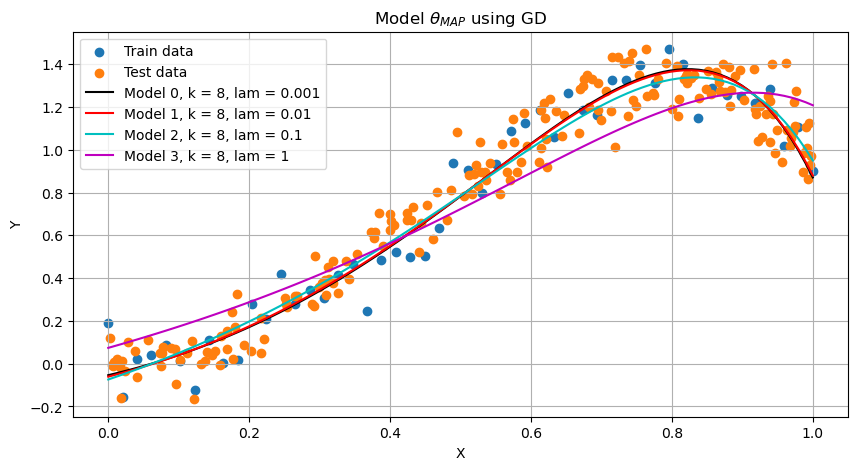

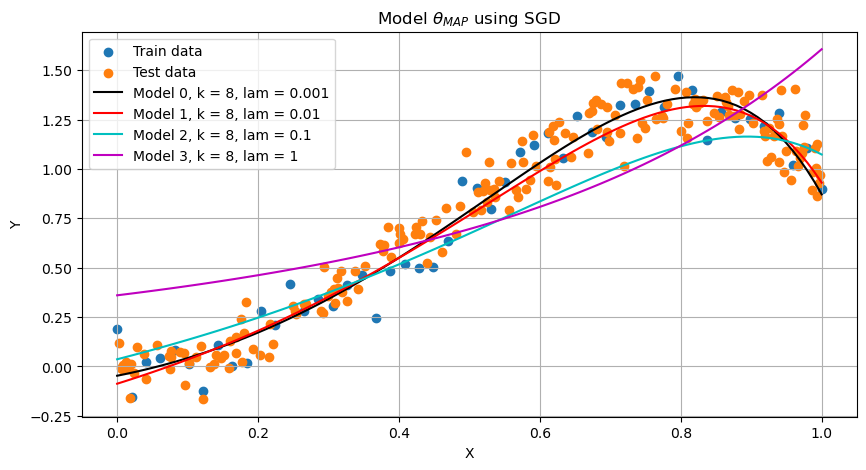

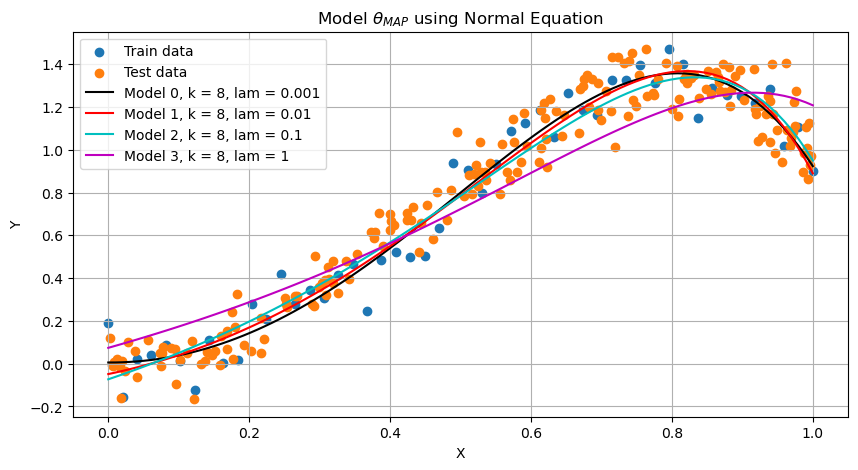

In [12]:
lamds = [0.001,0.01,0.1, 1]
#-------------------------------------------------------------------------------------------
# MAP GD
#-------------------------------------------------------------------------------------------
theta_histories_lambda = []
for lam in lamds:
    # MAP GD
    thetas_history_GD_MAP, converging_kk_history_GD_MAP = compute_weights(
        'GD', 'MAP', kk, train_data, lam = lam, loss=loss_MAP
        , grad_loss=grad_loss_MAP, kmax=epoch_or_iter)
    theta_histories_lambda.append(thetas_history_GD_MAP[-1])
# plot
plot_poly_regression(
    X_train, Y_train, X_test, Y_test, theta_histories_lambda, 
    title=titles_MAP[0], VS = True, lamds = lamds)
#-------------------------------------------------------------------------------------------
# MAP SGD
#-------------------------------------------------------------------------------------------
theta_histories_lambda = []
for lam in lamds:
    # MAP SGD
    thetas_history_SGD_MAP, converging_kk_history_SGD_MAP = compute_weights(
        'SGD', 'MAP', kk ,train_data, lam = lam,loss=loss_MAP, 
        grad_loss=grad_loss_MAP,batch_size = batch_size, 
        n_epochs=epoch_or_iter, alpha = alpha)
    theta_histories_lambda.append(thetas_history_SGD_MAP[-1])
# plot
plot_poly_regression(
    X_train, Y_train, X_test, Y_test, theta_histories_lambda,
    title=titles_MAP[1], VS = True, lamds = lamds)
#-------------------------------------------------------------------------------------------
# MAP Normal
#-------------------------------------------------------------------------------------------
theta_histories_lambda = []
for lam in lamds:
    # MAP Normal
    thetas_history_norm_MAP, converging_kk_history = compute_weights(
        'Normal', 'MAP', kk ,train_data, lam= lam)
    theta_histories_lambda.append(thetas_history_norm_MAP[-1])
# plot
plot_poly_regression(
    X_train, Y_train, X_test, Y_test, theta_histories_lambda
    ,title=titles_MAP[2], VS = True, lamds = lamds)

It can be noted how for larger $\lambda$ parameters, all three models tend to deviate from the true solution that best approximates the data.  
In some cases we have underfitting, even if the degree of the polinomial is more than necessary to predict the data. It is especially noticeable how $SGD$ is strongly influenced by this parameter.  
This beacusa for lamda too big we are "adding to much noise", so it is like predicting onother problem.  
Based on the graphs, for the next models we will choose small $\lambda$.

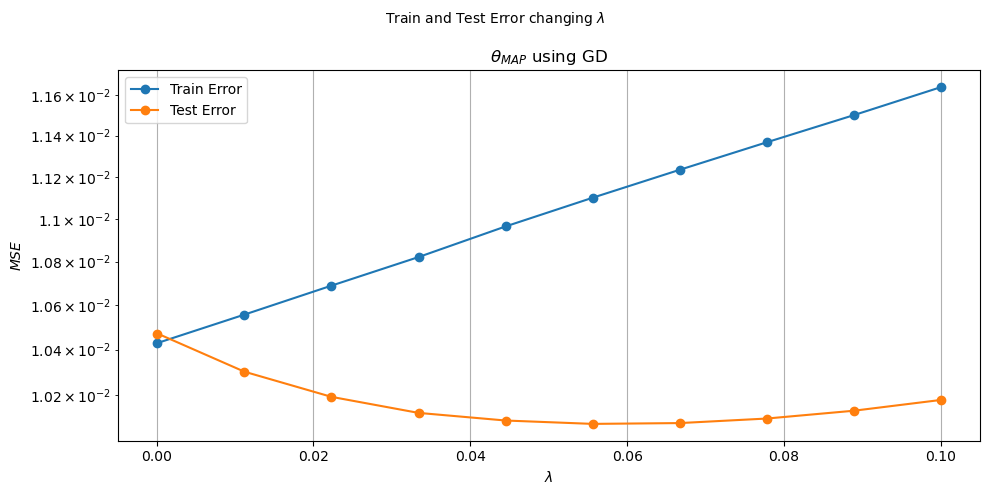

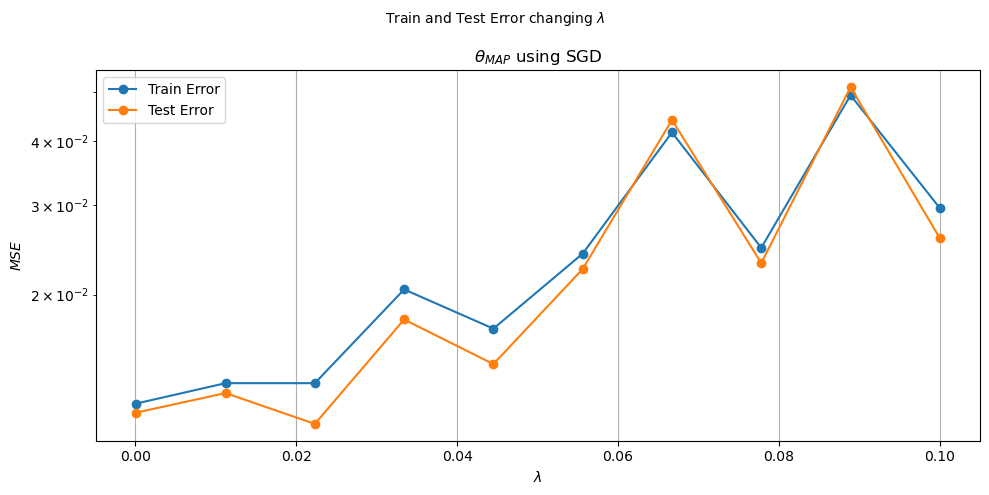

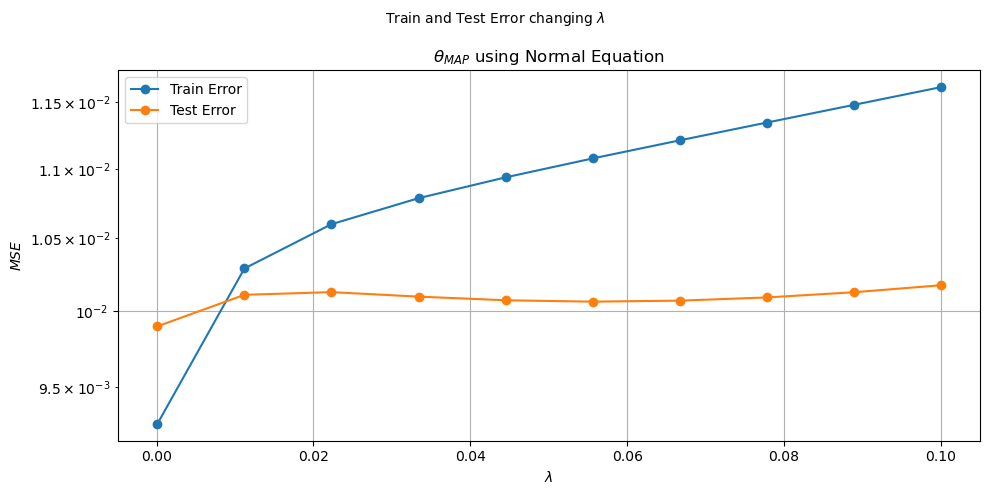

In [13]:
# Generate 10 random values between 0.001 and 0.1
lamds = np.sort(np.linspace(0.0001, 0.1, num=10))
#-------------------------------------------------------------------------------------------
# MAP GD
#-------------------------------------------------------------------------------------------
theta_histories_lambda = []
for lam in lamds:
    # MAP GD
    thetas_history_GD_MAP, converging_kk_history_GD_MAP = compute_weights(
        'GD', 'MAP', kk, train_data, lam = lam, loss=loss_MAP
        , grad_loss=grad_loss_MAP, kmax=epoch_or_iter)
    theta_histories_lambda.append(thetas_history_GD_MAP[-1])
# plot
plot_train_test_error_respect_to_lambda(X_train, Y_train, X_test, 
    Y_test, theta_histories_lambda, lamds, titles_MAP[0])
#-------------------------------------------------------------------------------------------
# MAP SGD
#-------------------------------------------------------------------------------------------
theta_histories_lambda = []
for lam in lamds:
    # MAP SGD
    thetas_history_SGD_MAP, converging_kk_history_SGD_MAP = compute_weights(
        'SGD', 'MAP', kk ,train_data, lam = lam,loss=loss_MAP, 
        grad_loss=grad_loss_MAP,batch_size = batch_size, 
        n_epochs=epoch_or_iter, alpha = alpha)
    theta_histories_lambda.append(thetas_history_SGD_MAP[-1])
# plot
plot_train_test_error_respect_to_lambda(X_train, Y_train, X_test, 
    Y_test, theta_histories_lambda, lamds, titles_MAP[1])
#-------------------------------------------------------------------------------------------
# MAP Normal
#-------------------------------------------------------------------------------------------
theta_histories_lambda = []
for lam in lamds:
    # MAP Normal
    thetas_history_norm_MAP, converging_kk_history = compute_weights(
        'Normal', 'MAP', kk ,train_data, lam= lam)
    theta_histories_lambda.append(thetas_history_norm_MAP[-1])
# plot
plot_train_test_error_respect_to_lambda(X_train, Y_train, X_test, 
    Y_test, theta_histories_lambda, lamds, titles_MAP[2])

By plotting the `test` and `training error` based on $\lambda$ we can note the following things:  
- For $GD$ and $NE$ as the $\lambda$ increases, therefore moving further and further away from the $MLE$ result, we obtain a **lower** `test error` compared to the `training error`, indicating that, even if the $\lambda$ remains very small in value, the model manages to generalize the test data in a better way.  
- Following theese indications we will choose a parameter of $\lambda = 0.055$

In [14]:
# General parameters
kk = 8 # polynomial degree
lam = 0.055

# data needed for SGD
epoch_or_iter = 2000 # also used for GD
batch_size = 5
alpha = 0.1

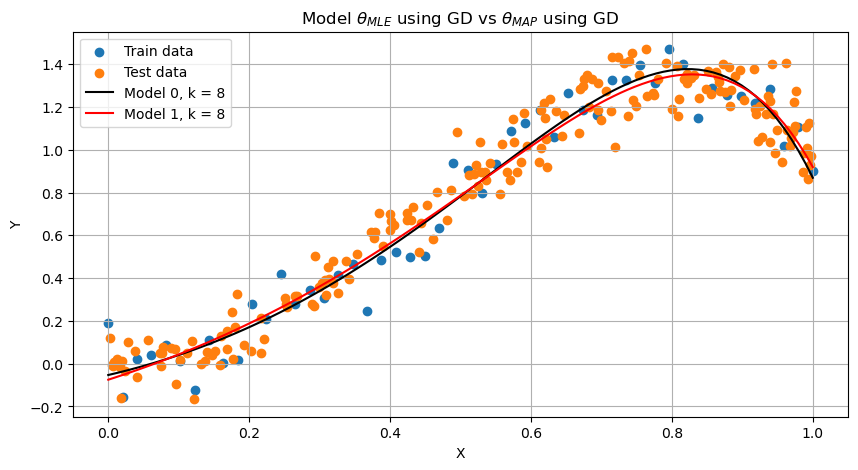

Mean Squared Error of the Test for MLE:  0.01047
Mean Squared Error of the Test for MAP:  0.01007
Mean Squared Error of the Train for MLE:  0.01043
Mean Squared Error of the Train for MAP:  0.01109


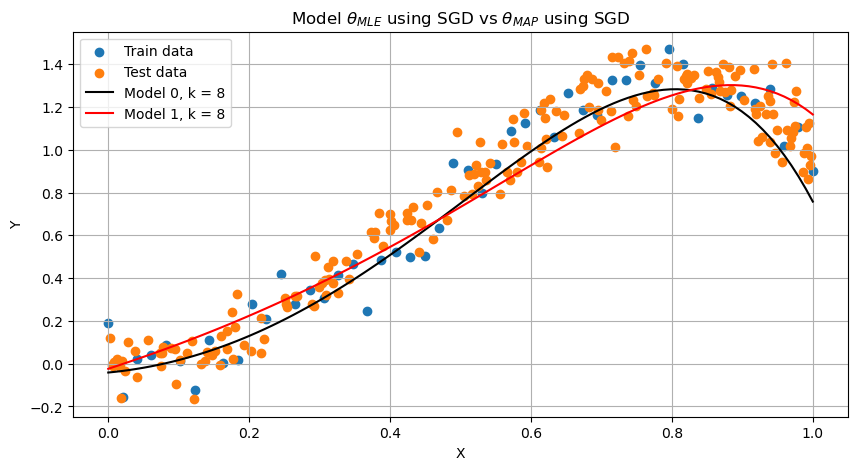

Mean Squared Error of the Test for MLE:  0.0159
Mean Squared Error of the Test for MAP:  0.01778
Mean Squared Error of the Train for MLE:  0.01371
Mean Squared Error of the Train for MAP:  0.01933


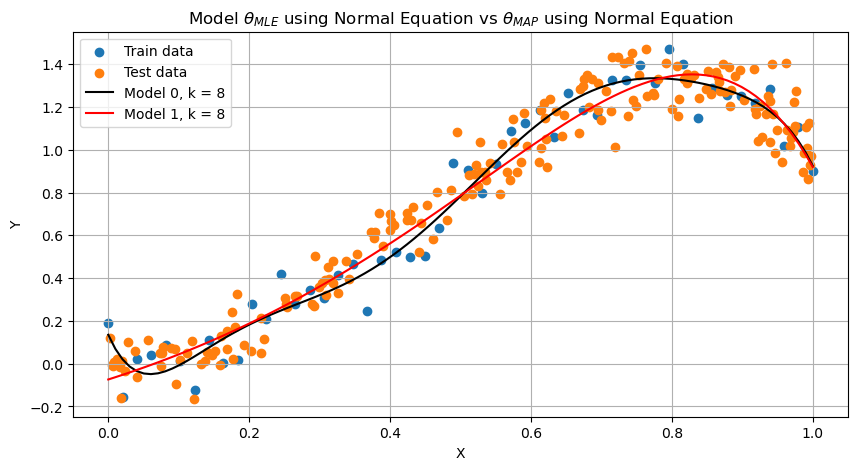

Mean Squared Error of the Test for MLE:  0.01094
Mean Squared Error of the Test for MAP:  0.01006
Mean Squared Error of the Train for MLE:  0.0081
Mean Squared Error of the Train for MAP:  0.01107


In [15]:
#-----------------------------------------------------------------------------------------------------------
# MLE VS MAP GD
#-----------------------------------------------------------------------------------------------------------
# MAP GD
thetas_history_GD_MAP, converging_kk_history_GD_MAP = compute_weights(
    'GD', 'MAP', kk, train_data, lam = lam, loss=loss_MAP
    , grad_loss=grad_loss_MAP, kmax=epoch_or_iter)
# MLE GD
thetas_history_GD_MLE, converging_kk_history_GD_MLE = compute_weights(
    'GD', 'MLE', kk, train_data, loss=loss_MLE
    , grad_loss=grad_loss_MLE, kmax=epoch_or_iter)
# plot
plot_poly_regression(
    X_train, Y_train, X_test, Y_test, [thetas_history_GD_MLE[-1], thetas_history_GD_MAP[-1]], 
    title=(titles_MLE[0]+" vs "+titles_MAP[0]), VS = True)
print("Mean Squared Error of the Test for MLE: ", round(mse_error(X_test, Y_test, thetas_history_GD_MLE[-1]),5))
print("Mean Squared Error of the Test for MAP: ", round(mse_error(X_test, Y_test, thetas_history_GD_MAP[-1]),5))
print("Mean Squared Error of the Train for MLE: ", round(mse_error(X_train, Y_train, thetas_history_GD_MLE[-1]),5))
print("Mean Squared Error of the Train for MAP: ", round(mse_error(X_train, Y_train, thetas_history_GD_MAP[-1]),5))

#-----------------------------------------------------------------------------------------------------------
# MLE VS MAP SGD
#-----------------------------------------------------------------------------------------------------------
# MLE SGD
thetas_history_SGD_MLE, converging_kk_history_SGD_MLE = compute_weights(
     'SGD', 'MLE', kk ,train_data,loss=loss_MLE, 
     grad_loss=grad_loss_MLE,batch_size = batch_size, 
     n_epochs=epoch_or_iter, alpha = alpha)
# MAP SGD
thetas_history_SGD_MAP, converging_kk_history_SGD_MAP = compute_weights(
     'SGD', 'MAP', kk ,train_data, lam = lam,loss=loss_MAP, 
     grad_loss=grad_loss_MAP,batch_size = batch_size, 
     n_epochs=epoch_or_iter, alpha = alpha)
# plot
plot_poly_regression(
    X_train, Y_train, X_test, Y_test, [thetas_history_SGD_MLE[-1], thetas_history_SGD_MAP[-1]],
    title=(titles_MLE[1]+" vs "+titles_MAP[1]), VS = True)
print("Mean Squared Error of the Test for MLE: ", round(mse_error(X_test, Y_test, thetas_history_SGD_MLE[-1]),5))
print("Mean Squared Error of the Test for MAP: ", round(mse_error(X_test, Y_test, thetas_history_SGD_MAP[-1]),5))
print("Mean Squared Error of the Train for MLE: ", round(mse_error(X_train, Y_train, thetas_history_SGD_MLE[-1]),5))
print("Mean Squared Error of the Train for MAP: ", round(mse_error(X_train, Y_train, thetas_history_SGD_MAP[-1]),5))

#-----------------------------------------------------------------------------------------------------------
# MLE Normal
#-----------------------------------------------------------------------------------------------------------
thetas_history_norm_MLE, converging_kk_history = compute_weights(
    'Normal', 'MLE', kk ,train_data)
# MAP Normal
thetas_history_norm_MAP, converging_kk_history = compute_weights(
    'Normal', 'MAP', kk ,train_data, lam= lam)
# plot
plot_poly_regression(
    X_train, Y_train, X_test, Y_test, [thetas_history_norm_MLE[-1],thetas_history_norm_MAP[-1]]
    ,title=(titles_MLE[2]+" vs "+titles_MAP[2]), VS = True)

print("Mean Squared Error of the Test for MLE: ", round(mse_error(X_test, Y_test, thetas_history_norm_MLE[-1]),5))
print("Mean Squared Error of the Test for MAP: ", round(mse_error(X_test, Y_test, thetas_history_norm_MAP[-1]),5))
print("Mean Squared Error of the Train for MLE: ", round(mse_error(X_train, Y_train, thetas_history_norm_MLE[-1]),5))
print("Mean Squared Error of the Train for MAP: ", round(mse_error(X_train, Y_train, thetas_history_norm_MAP[-1]),5))


As it was deducible from what was said above, using $MAP$, we can decrease the test error of the model, respect to the model of $MLE$, obtaining models that rapresents more the structure of the data.   
This at the cost of increaseing, even if it slightly, the training one.  
This holds only using an appropriate $\lambda$, infact as we can note, SGD does not improve, as expected.